# Let's do a couple plotting exercises with these libraries

Execute the following cell to import the libraries and standardize some settings.

In [2]:
%matplotlib inline

# numerical
import pandas as pd
import numpy as np

# matplotlib
import matplotlib.pyplot as plt

# seaborn
import seaborn as sns
sns.set()
sns.set_context('notebook', font_scale=1.5)
cp = sns.color_palette()

# altair
import altair

# plotly express
import plotly.express as px

Execute the following to import Seaborn's example FMRI dataset.

In [3]:
fmri = sns.load_dataset("fmri")
fmri.head()

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970

Make a new dataframe that only includes the `stim` event and `parietal` region data.

In [5]:
fmri_sp = fmri.loc[(fmri['event']=='stim') & (fmri['region']=='parietal')]

Print out the first couple rows to check that it looks ok.

In [6]:
fmri_sp.head()

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970

Make a single line plot with Matplotlib that plots signal vs time for each subject.

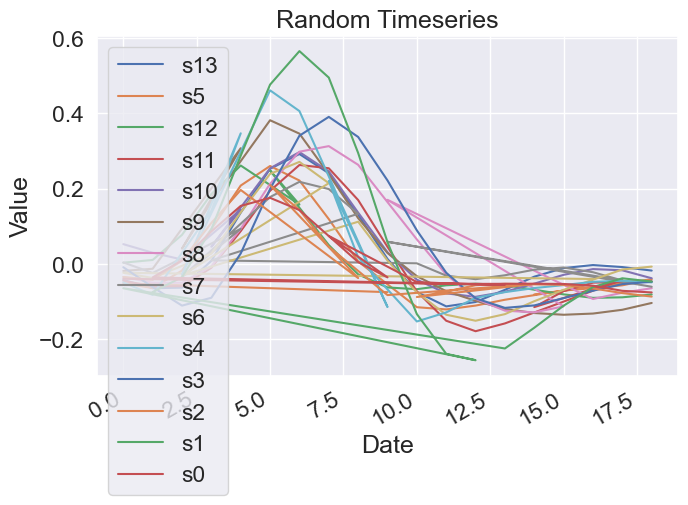

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(7.5, 5))

for k in fmri_sp.subject.unique():
    tmp = fmri_sp[fmri_sp.subject == k]
    ax.plot(tmp.timepoint, tmp.signal, label=k)

ax.set(xlabel='Date',
       ylabel='Value',
       title='Random Timeseries')    
    
ax.legend(loc=2)
fig.autofmt_xdate()

If the above plot looks jagged, note that you may find it useful to sort the values by time before plotting.  Use the below cells to do so if the above plot does not contain smooth curves in time.

In [7]:
fmri_sp = fmri.loc[(fmri['event']=='stim') & 
                   (fmri['region']=='parietal')].sort_values(by='timepoint').copy()

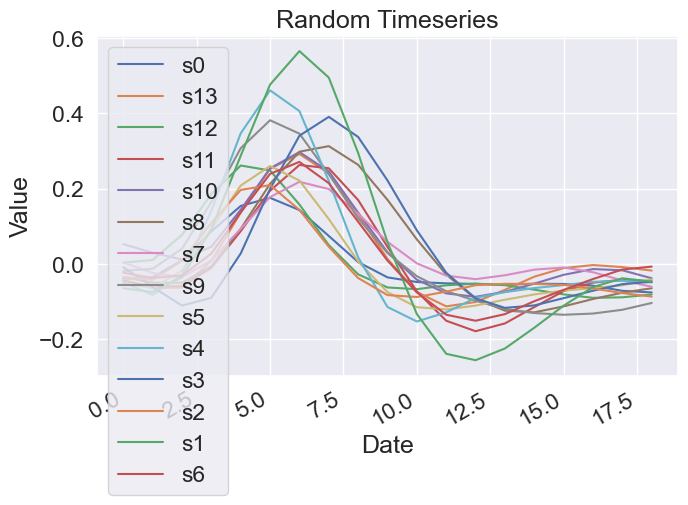

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(7.5, 5))

for k in fmri_sp.subject.unique():
    tmp = fmri_sp[fmri_sp.subject == k]
    ax.plot(tmp.timepoint, tmp.signal, label=k)

ax.set(xlabel='Date',
       ylabel='Value',
       title='Random Timeseries')    
    
ax.legend(loc=2)
fig.autofmt_xdate()

Make a line plot that only contains lines for subjects `s0` and `s1`.

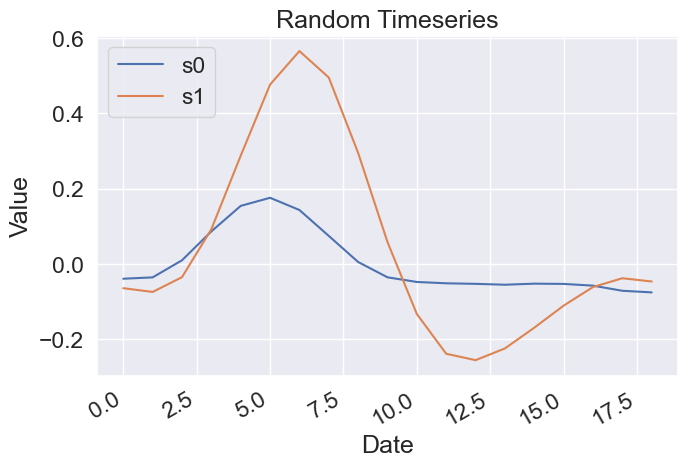

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(7.5, 5))

for k in ['s0','s1']:
    tmp = fmri_sp[fmri_sp.subject == k]
    ax.plot(tmp.timepoint, tmp.signal, label=k)

ax.set(xlabel='Date',
       ylabel='Value',
       title='Random Timeseries')    
    
ax.legend(loc=2)
fig.autofmt_xdate()

Execute the following to get the new dataframe `dfp` that contains one column per subject.

In [10]:
dfp = fmri[(fmri['event']=='stim') & 
           (fmri['region']=='parietal')].pivot(index='timepoint', 
                                               columns=['subject'], 
                                               values='signal')
dfp.head()

subject          s0        s1       s10       s11       s12       s13  \
timepoint                                                               
0         -0.039327 -0.064454  0.052619 -0.044634  0.003358 -0.042467   
1         -0.035735 -0.074402  0.029822 -0.059354  0.010625 -0.064256   
2          0.009642 -0.035153  0.011751 -0.059089  0.077277 -0.062916   
3          0.086399  0.092221  0.045838 -0.010138  0.185581  0.008418   
4          0.154058  0.287294  0.143986  0.087175  0.261283  0.136219   

subject          s2        s3        s4        s5        s6        s7  \
timepoint                                                               
0         -0.034407 -0.008576 -0.048869 -0.051228 -0.023319  0.004081   
1         -0.042087 -0.061460 -0.082174 -0.063907 -0.037326 -0.023883   
2          0.008791 -0.110565 -0.028109 -0.017499 -0.030781 -0.034874   
3          0.108916 -0.089708  0.141458  0.092712  0.027562  0.009548   
4          0.196461  0.027879  0.346775  0.208112  0.136847  0.093309   

subject          s8        s9  
timepoint                      
0         -0.034340 -0.018369  
1         -0.049532 -0.012765  
2         -0.049964  0.040620  
3         -0.006123  0.164446  
4          0.093181  0.307250

Execute the following to get a quick and dirty plot of all the subjects at once.

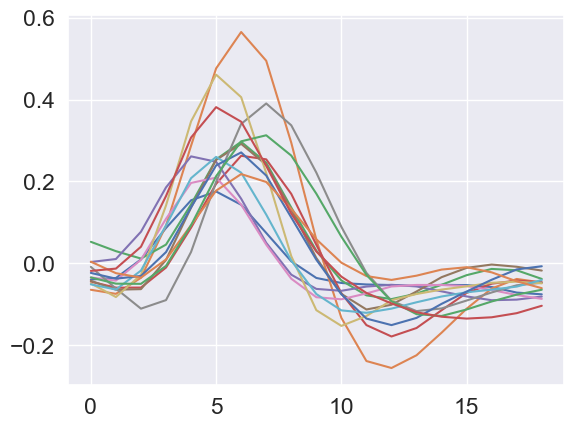

In [12]:
plt.plot(dfp)

Make a tidier line plot that includes lines for those subjects in the first four columns of `dfp`

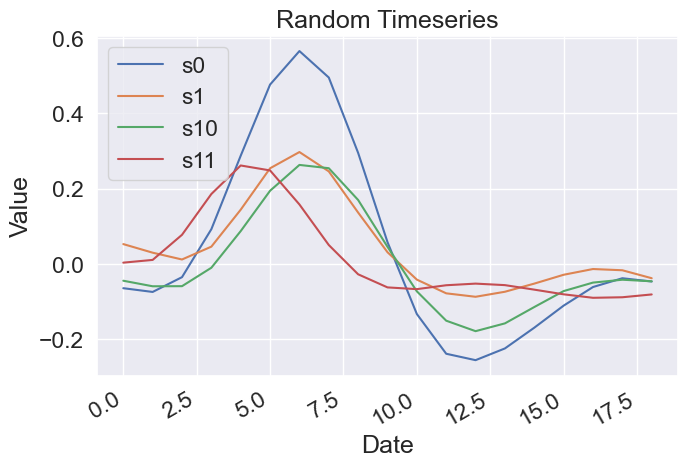

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(7.5, 5))

ax.plot(dfp.iloc[:,1:5])

ax.set(xlabel='Date',
       ylabel='Value',
       title='Random Timeseries')

ax.legend(dfp.columns, loc=2)
fig.autofmt_xdate()

## Seaborn

Make a line plot with Seaborn (using `lineplot`).  This plot should plot the average signal of all subjects vs time, along with an error interval.

<AxesSubplot: xlabel='timepoint', ylabel='signal'>

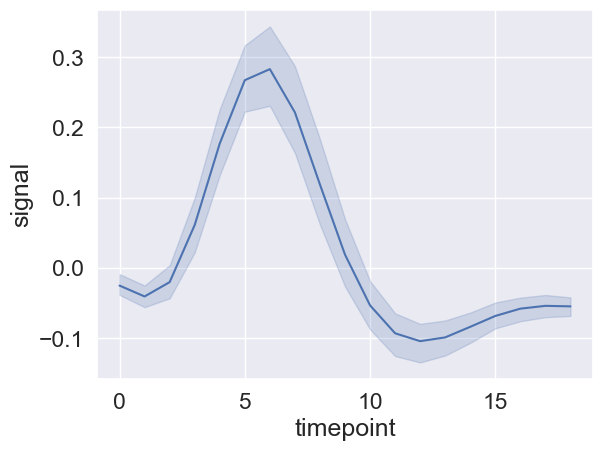

In [15]:
sns.lineplot(data=fmri_sp,x='timepoint',y='signal')

Use `lineplot` to make a figure that only includes lines for subjects `s0` and `s1`

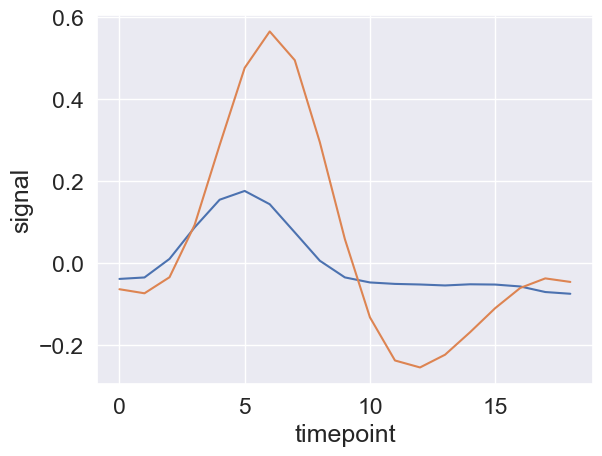

In [16]:
for k in ['s0','s1']:
    sns.lineplot(data=fmri_sp[fmri_sp['subject']==k],x='timepoint',y='signal')

Make a facet grid with Seaborn that has one line plot per subject.  When doing this, set `col_wrap` so that a reasonably sized grid of plots appears.

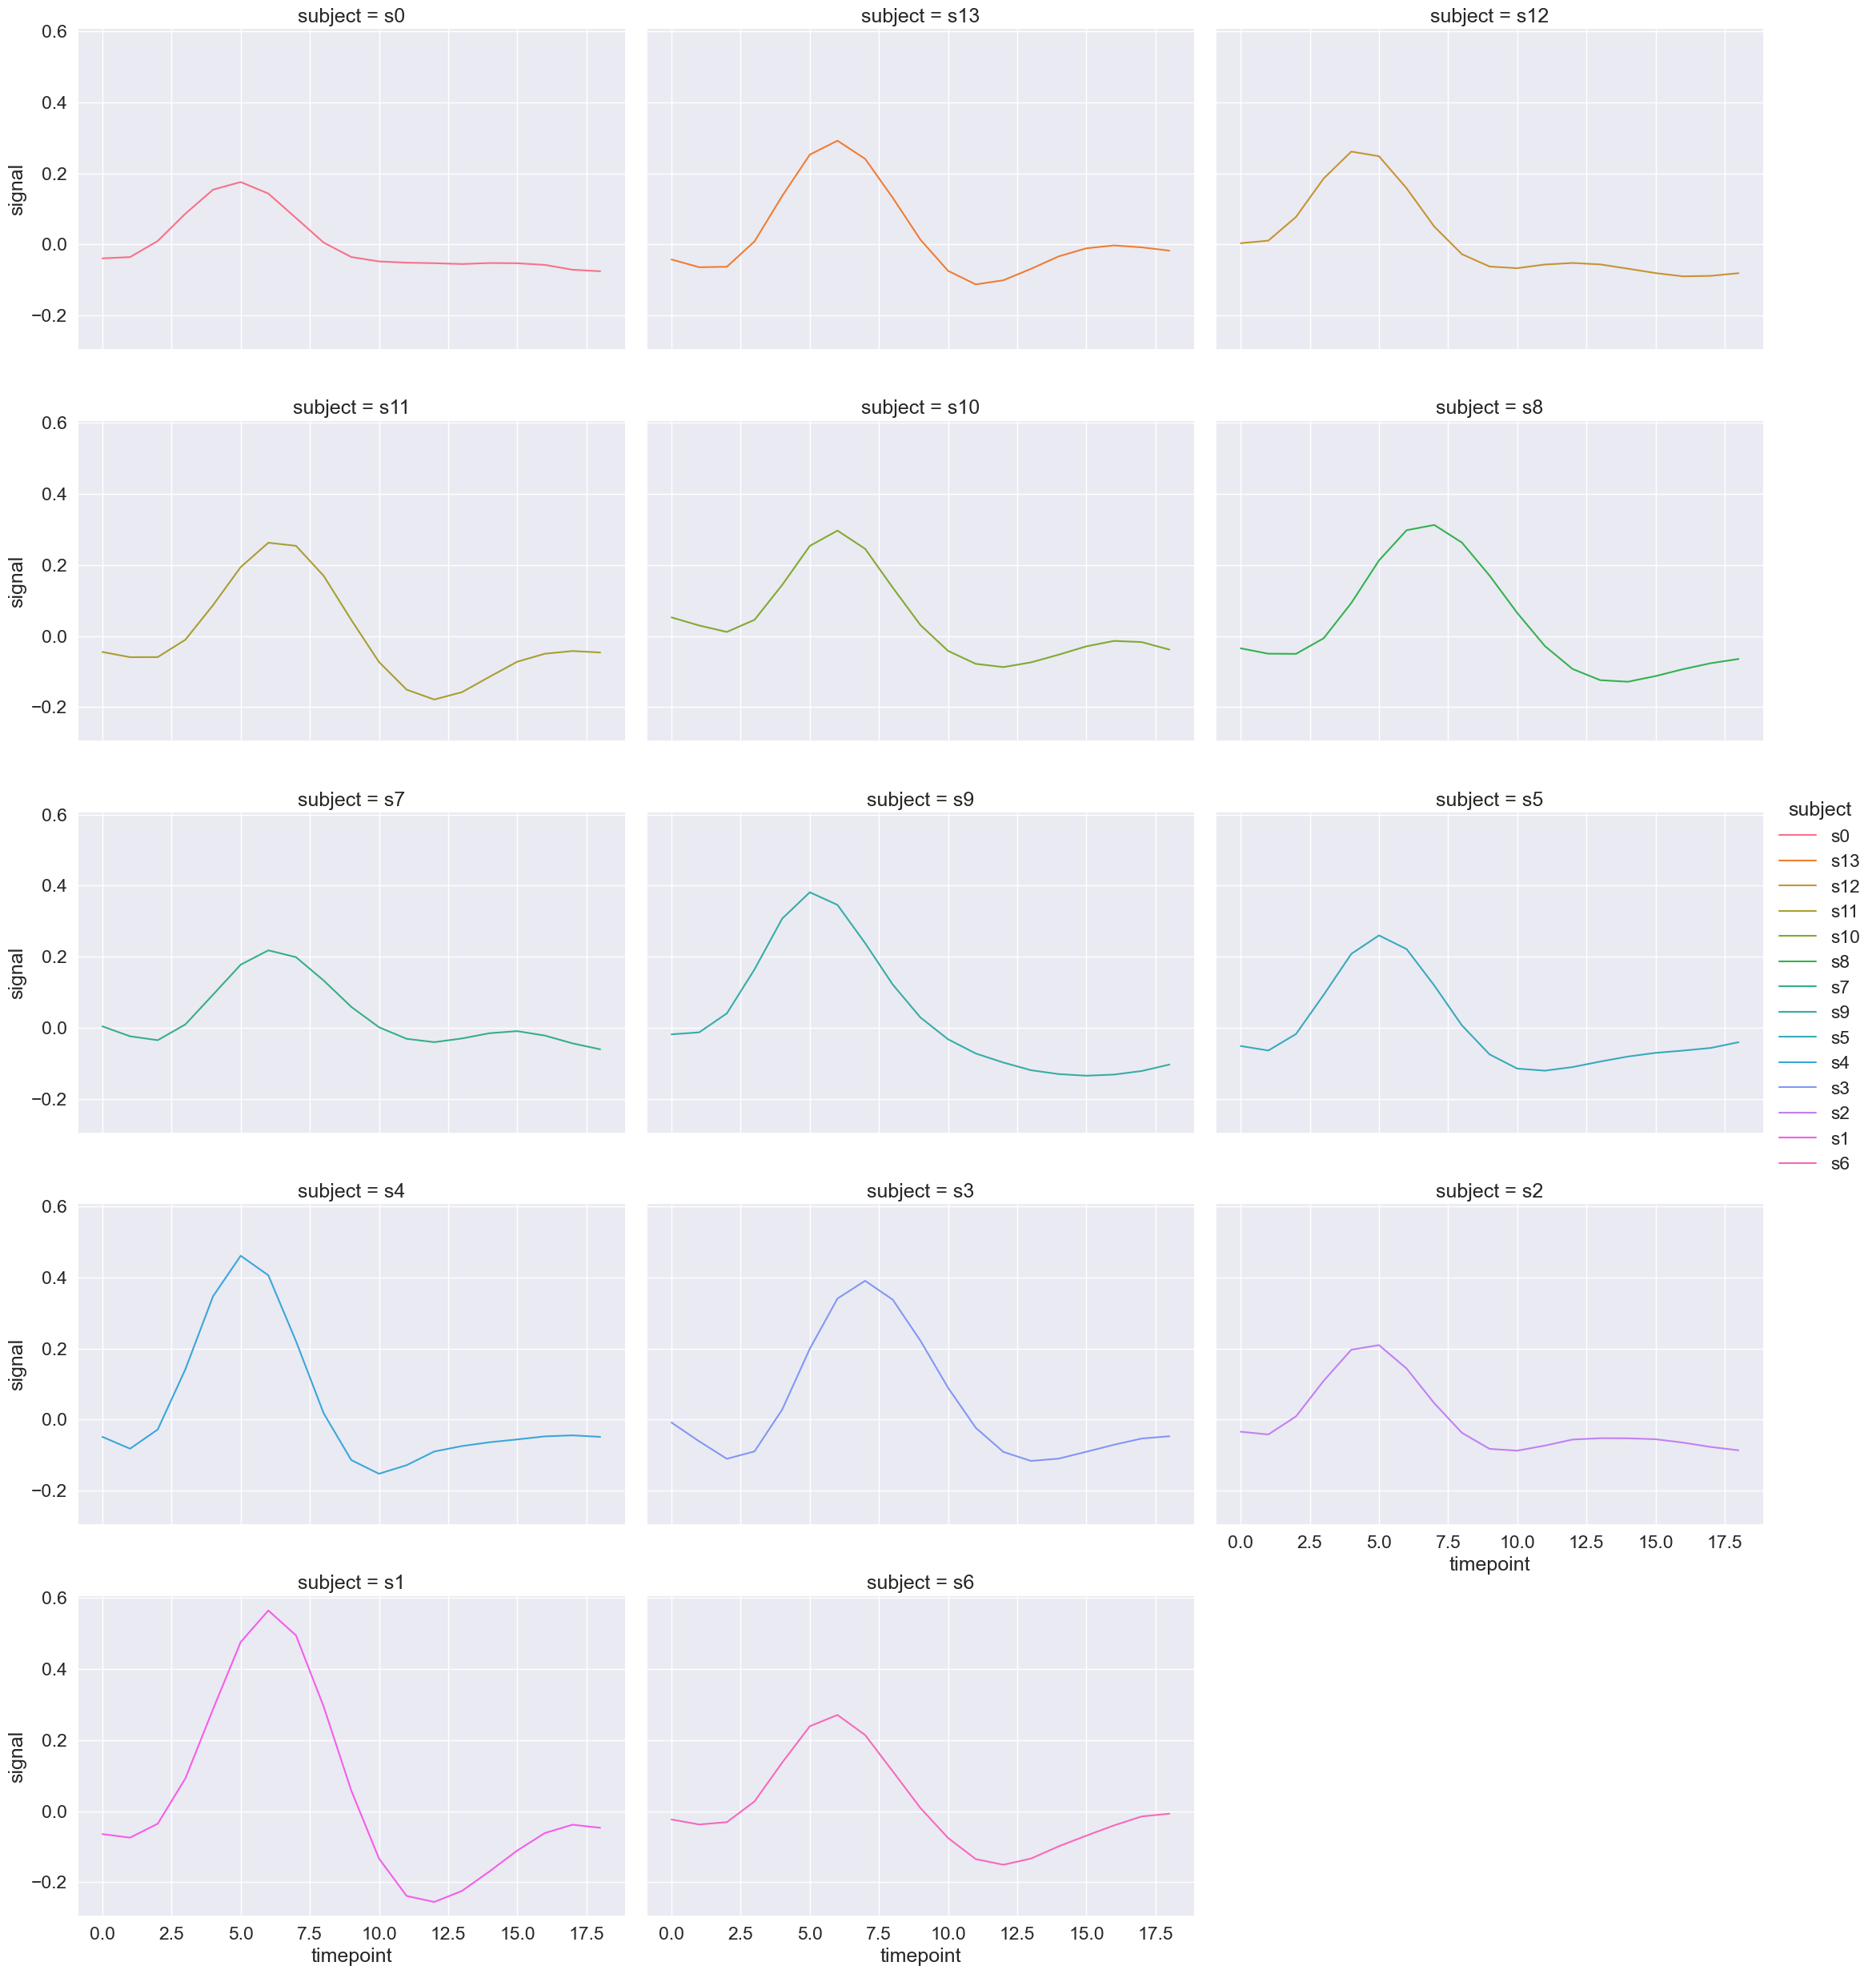

In [17]:
g = sns.FacetGrid(fmri_sp, col='subject', hue='subject', height=5, aspect=1.5, col_wrap=3)
g.map(plt.plot, 'timepoint', 'signal').add_legend()

## Plotly

Use Plotly to make a single line plot that contains signal vs time for all the subjects.

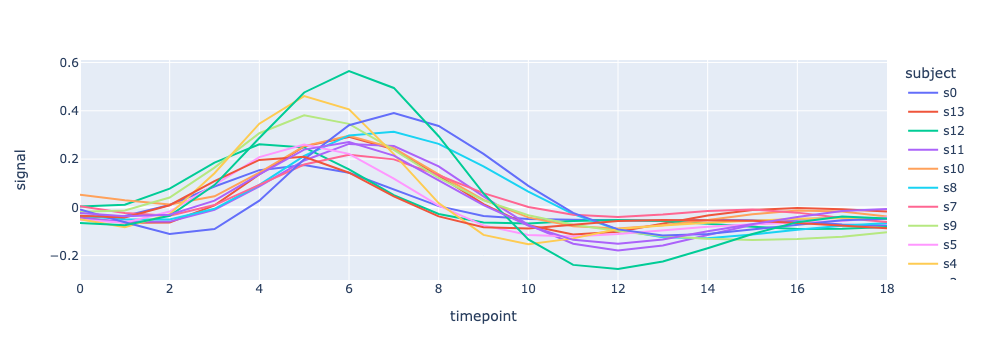

In [ ]:
fig = px.line(fmri_sp, x="timepoint", y="signal", color='subject')
fig.show()

Make a single line plot that contains signal vs time for subjects `s0` and `s1`.

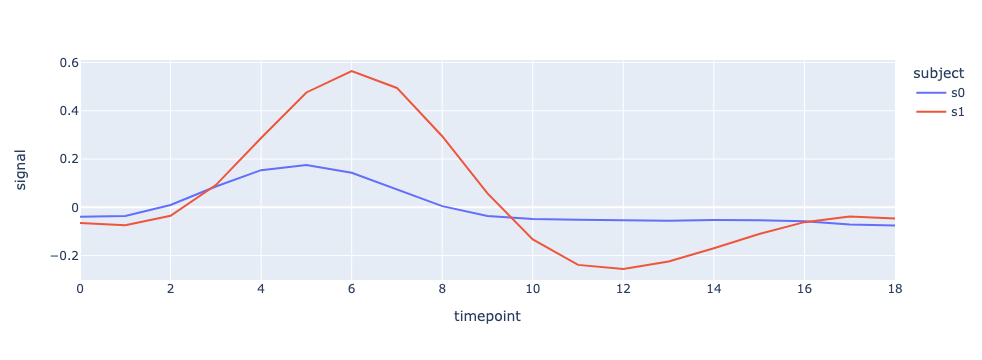

In [46]:
px.line(fmri_sp[fmri_sp['subject'].isin(['s0','s1'])], x="timepoint", y="signal", color='subject')

## Altair

Make a new dataframe that contains only subjects `s0`, `s1`, `s2`, and `s3`

In [18]:
fmri_sp_4 = fmri_sp[fmri_sp['subject'].isin(['s0','s1','s2','s3'])].copy()

Use Altair to make a line plot with one line for each of these four subjects.

In [19]:
c = altair.Chart(fmri_sp_4).mark_line().encode(
    x='timepoint',
    y='signal',
    color=altair.Color('subject', scale=altair.Scale(range=cp.as_hex()))
)
c

alt.Chart(...)

Make the same figure, but include a selection object so that you can highlight one line (i.e., change the opacity) for one particular subject based on clicking on that subject in the legend.

In [20]:
selopac = altair.selection_multi(fields=['subject'], bind='legend')

c = altair.Chart(fmri_sp_4).mark_line().encode(
    x='timepoint',
    y='signal',
    color=altair.Color('subject', scale=altair.Scale(range=cp.as_hex())),
    opacity=altair.condition(selopac, altair.value(1), altair.value(0.2))
).add_selection(
    selopac
)
c

alt.Chart(...)

Create the same figure and save it to an HTML file.  Make sure that the saved HTML file works as expected.

In [21]:
selopac = altair.selection_multi(fields=['subject'], bind='legend')

c = altair.Chart(fmri_sp_4).mark_line().encode(
    x='timepoint',
    y='signal',
    color=altair.Color('subject', scale=altair.Scale(range=cp.as_hex())),
    opacity=altair.condition(selopac, altair.value(1), altair.value(0.2))
).add_selection(
    selopac
)
c.save('altair_legendselect_2.html')